## Introduction

In marketing, conversion rate (CVR) is a percentage that measures how many users have taken a desired action after interacting with a brand's content or ads. It's used to evaluate the performance of marketing campaigns, website traffic, and conversions. Our goal in this project is to predict conversion rate, and make recommendations to the product and the marketing team on ways to improve conversion rate.

### Dataset Details

This dataset provides a comprehensive view of customer interactions with digital marketing campaigns. It includes demographic data, marketing-specific metrics, customer engagement indicators, and historical purchase data, making it suitable for predictive modeling and analytics in the digital marketing domain.

Features
*  Demographic Information
    *  CustomerID: Unique identifier for each customer.
    *  Age: Age of the customer.
    *  Gender: Gender of the customer (Male/Female).
    *  Income: Annual income of the customer in USD.
* Marketing-specific Variables
    *  CampaignChannel: The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral).
    *  CampaignType: Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).
    *  AdSpend: Amount spent on the marketing campaign in USD.
    *  ClickThroughRate: Rate at which customers click on the marketing content.
    *  ConversionRate: Rate at which clicks convert to desired actions (e.g., purchases).
    *  AdvertisingPlatform: Confidential.
    *  AdvertisingTool: Confidential.
* Customer Engagement Variables
    *  WebsiteVisits: Number of visits to the website.
    *  PagesPerVisit: Average number of pages visited per session.
    *  TimeOnSite: Average time spent on the website per visit (in minutes).
    *  SocialShares: Number of times the marketing content was shared on social media.
    *  EmailOpens: Number of times marketing emails were opened.
    *  EmailClicks: Number of times links in marketing emails were clicked.
* Historical Data
    *  PreviousPurchases: Number of previous purchases made by the customer.
    *  LoyaltyPoints: Number of loyalty points accumulated by the customer.
*  Target Variable
    *  Conversion: Binary variable indicating whether the customer converted (1) or not (0)

## Importing Libraries

Importing all the necessary libraries.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, classification_report


## Importing Dataset

In [224]:
marketing_data = pd.read_csv('/content/drive/MyDrive/NLP/digital_marketing_campaign_dataset.csv')
marketing_data.shape

(8000, 20)

In [225]:
data = marketing_data.copy()  #Keeping a copy of the dataset so that we don't alter the original data while exploring

### Looking into the Data

In [226]:
marketing_data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [227]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

We need to handle the object types. Though there are no nulls in this dataset, future dataset might have null records. We need to work around that to handle.

In [228]:
marketing_data.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


Scaling needs to be done since the values in different columns varies significantly

In [229]:
marketing_data['Conversion'].value_counts()

,count
Conversion,
1,7012
0,988


Higher records are present for Conversion rate 1. This might cause model biasing. We need to work around this as well.

Data Distribution for the numerical types -

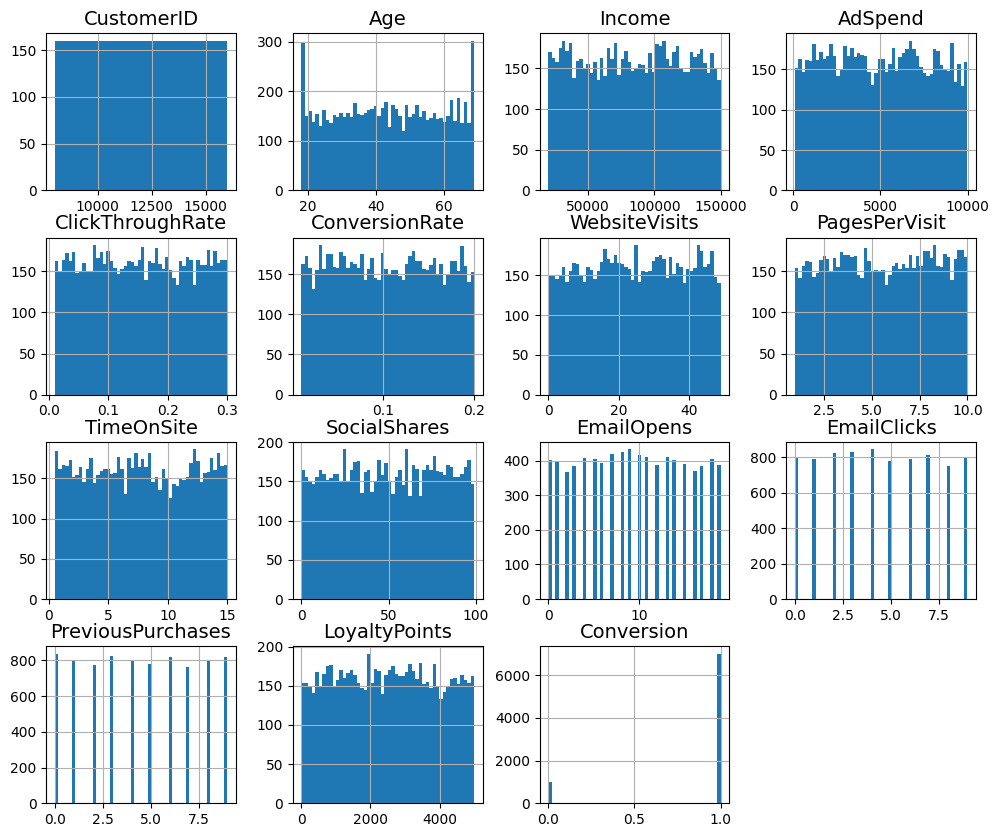

In [230]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

marketing_data_numeric = marketing_data.select_dtypes(exclude='object')

marketing_data_numeric.hist(bins=50, figsize=(12, 10))
plt.show()

Data Distribution for Categorical Types

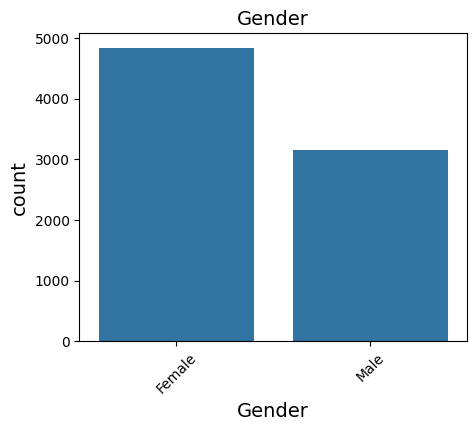

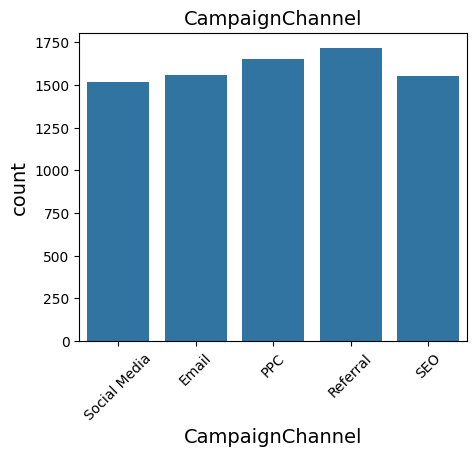

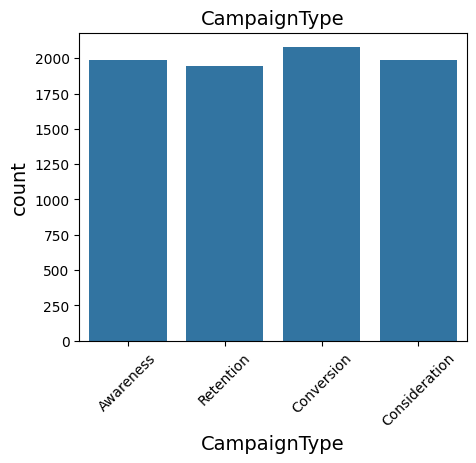

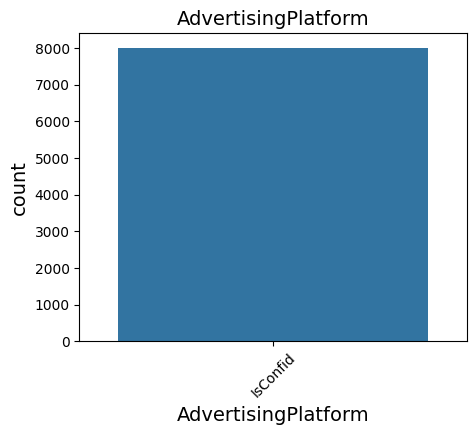

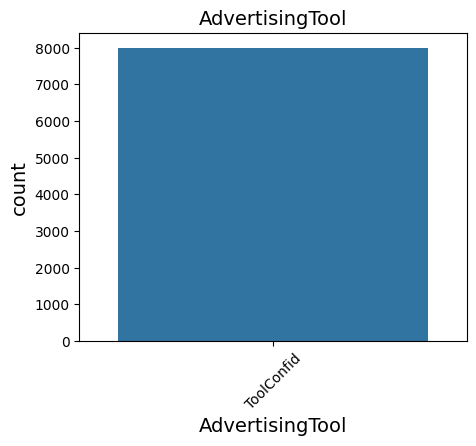

In [128]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

marketing_data_cat = marketing_data.select_dtypes(include='object')

columns = marketing_data_cat.columns.tolist()
for col in columns:
  plt.figure(figsize=(5, 4))
  sns.countplot(data = marketing_data_cat[[col]], x = col)
  plt.title(col)
  plt.xticks(rotation=45)
  plt.show()

Gender column may cause bias, with Female having more records than Male. The columns of AdvertisingTool and AdvertisingPlatform is having same data for all records, hence we can drop it. We will drop it later.

Before exploring any further and performing data processing, let's split up the training and the testing data. Everything we will do will be with training data only.

When dealing with an imbalanced target class, splitting the data into training and testing sets needs to ensure that the split preserves the distribution of the target classes across both sets. This technique is called stratified splitting. It ensures that both the training and test sets maintain the same proportion of each class as the original dataset.

## Splitting the dataset

In [231]:
marketing_data['Conversion'].value_counts()

,count
Conversion,
1,7012
0,988


In [232]:
strat_train_set, strat_test_set = train_test_split(marketing_data, test_size = 0.2, stratify = marketing_data['Conversion'], random_state = 42)

In [217]:
strat_test_set['Conversion'].value_counts() / len(strat_test_set)

,count
Conversion,
1,0.876563
0,0.123438


In [218]:
strat_train_set['Conversion'].value_counts() / len(strat_train_set)

,count
Conversion,
1,0.876563
0,0.123438


In [219]:
marketing_data['Conversion'].value_counts() / len(marketing_data)

,count
Conversion,
1,0.876563
0,0.123438


The proportions proves stratified sampling

## Visualizations over Training Data

In [135]:
marketing_data = strat_train_set.copy()

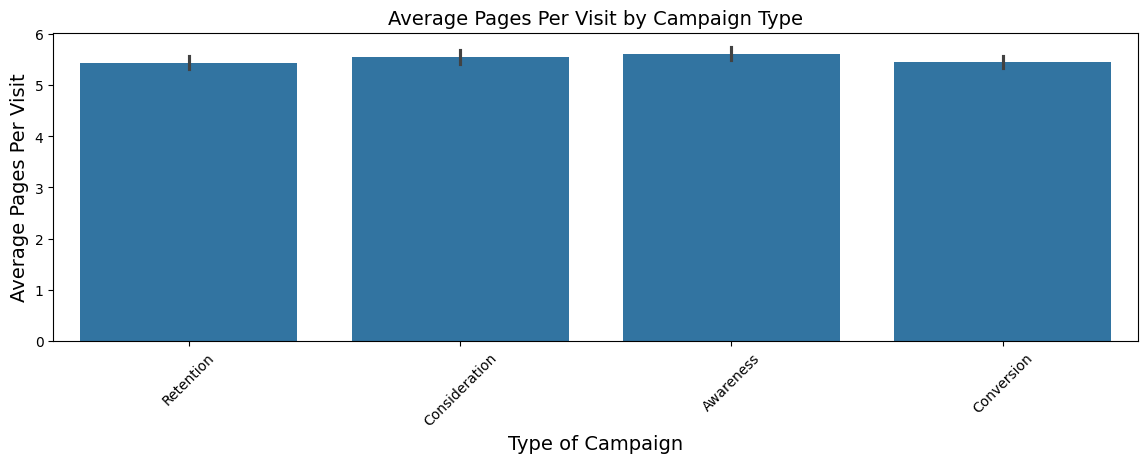

In [136]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.figure(figsize=(14, 4))
ax = sns.barplot(x="CampaignType", y="PagesPerVisit", data=marketing_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Average Pages Per Visit by Campaign Type')
plt.xlabel('Type of Campaign')
plt.ylabel('Average Pages Per Visit')
plt.show()

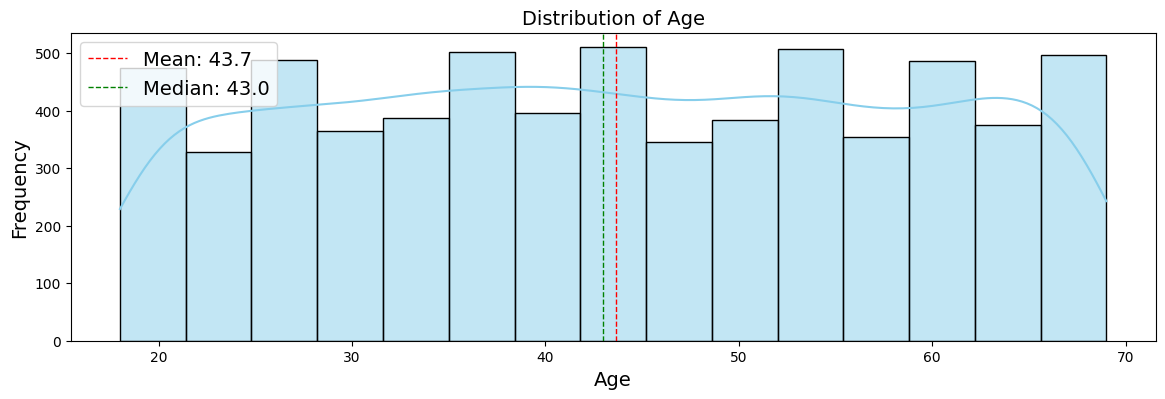

In [137]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.figure(figsize=(14, 4))
sns.histplot(marketing_data['Age'], bins=15, kde=True, color='skyblue', edgecolor='black')

mean_age = marketing_data['Age'].mean()
median_age = marketing_data['Age'].median()

plt.axvline(mean_age, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='--', linewidth=1, label=f'Median: {median_age:.1f}')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

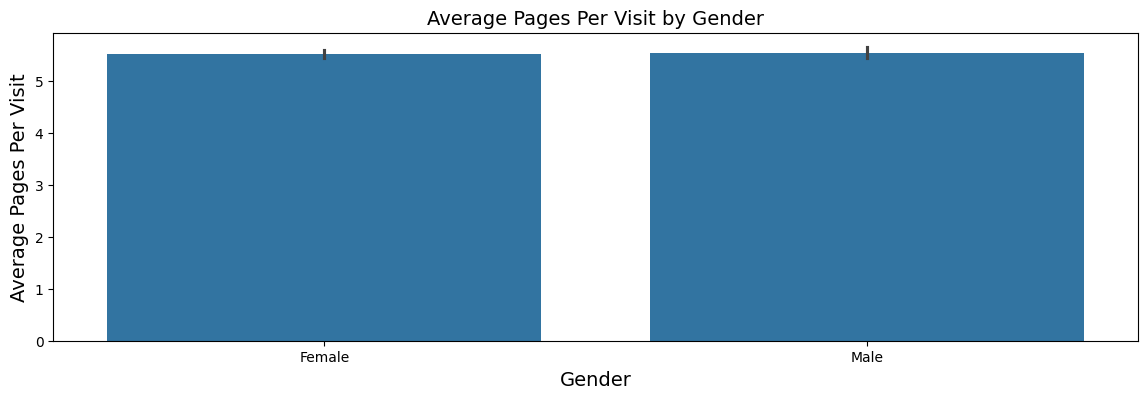

In [138]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.figure(figsize=(14, 4))
ax = sns.barplot(x="Gender", y="PagesPerVisit", data=marketing_data)
plt.title('Average Pages Per Visit by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Pages Per Visit')
plt.grid(False)
plt.show()

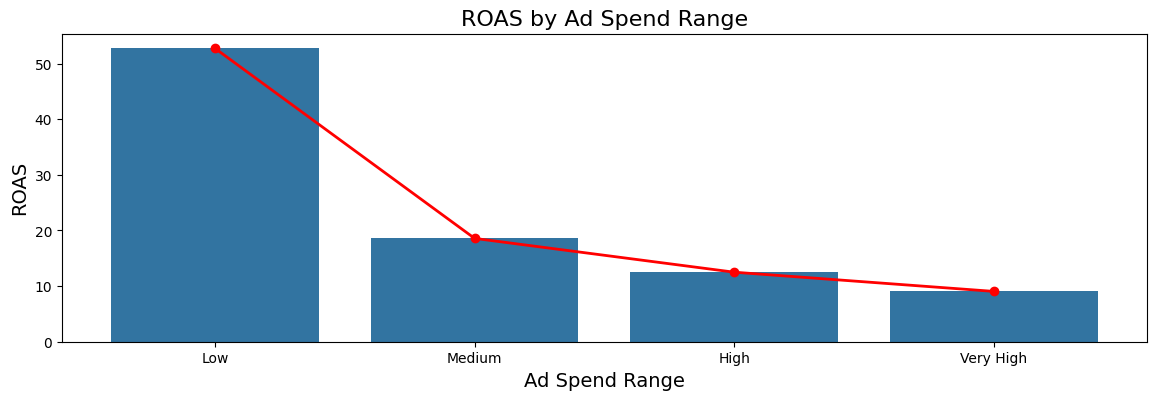

In [139]:
marketing_data['AdSpend_bins'] = pd.qcut(marketing_data['AdSpend'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
roas = marketing_data.groupby('AdSpend_bins').apply(lambda x: (x['Conversion'].sum() * x['Income'].mean()) / x['AdSpend'].sum())


plt.figure(figsize=(14, 4))
ax = sns.barplot(x=roas.index, y=roas.values)
plt.plot(roas.index, roas.values, color='red', marker='o', linewidth=2)
plt.title('ROAS by Ad Spend Range', fontsize=16)
plt.xlabel('Ad Spend Range', fontsize=14)
plt.ylabel('ROAS', fontsize=14)
plt.grid(False)
plt.show()

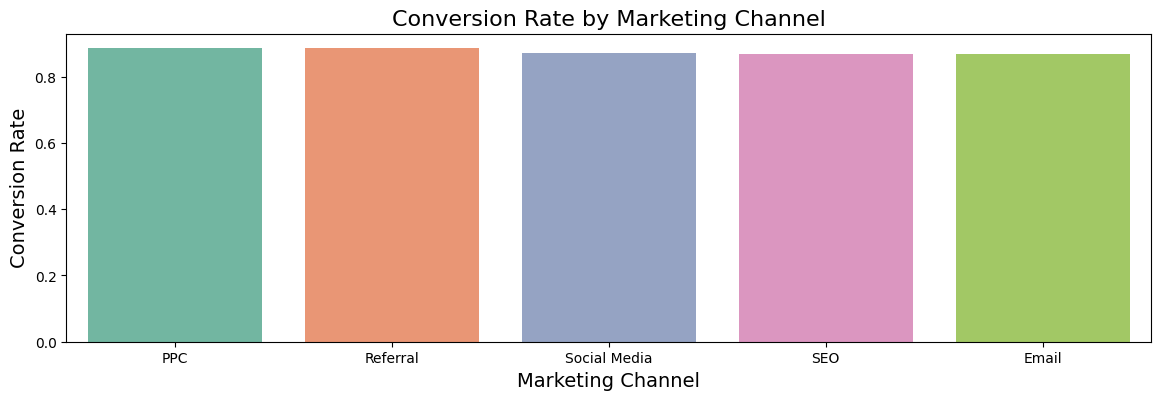

In [140]:
conversion_rate_by_channel = marketing_data.groupby('CampaignChannel')['Conversion'].mean().sort_values(ascending=False)


plt.figure(figsize=(14, 4))
ax = sns.barplot(x=conversion_rate_by_channel.index, y=conversion_rate_by_channel.values, palette='Set2')
plt.title('Conversion Rate by Marketing Channel', fontsize=16)
plt.xlabel('Marketing Channel', fontsize=14)
plt.ylabel('Conversion Rate', fontsize=14)
plt.grid(False)
plt.show()

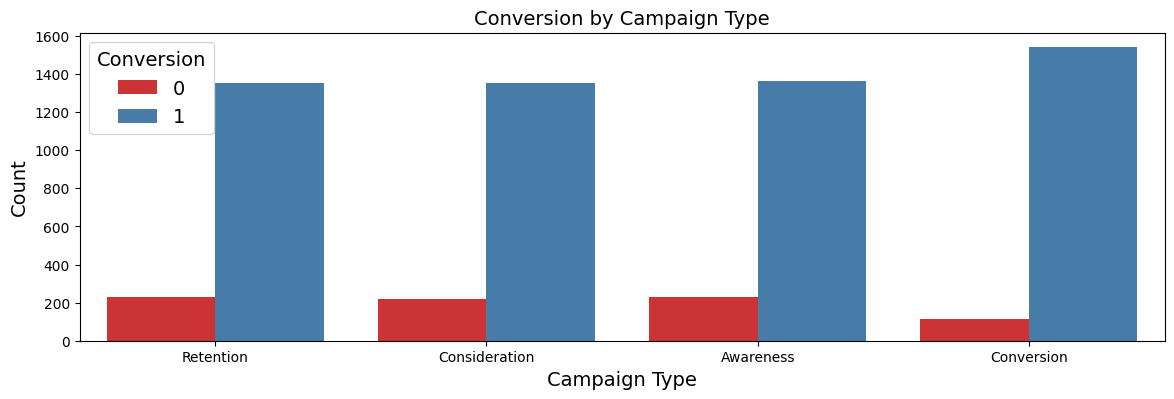

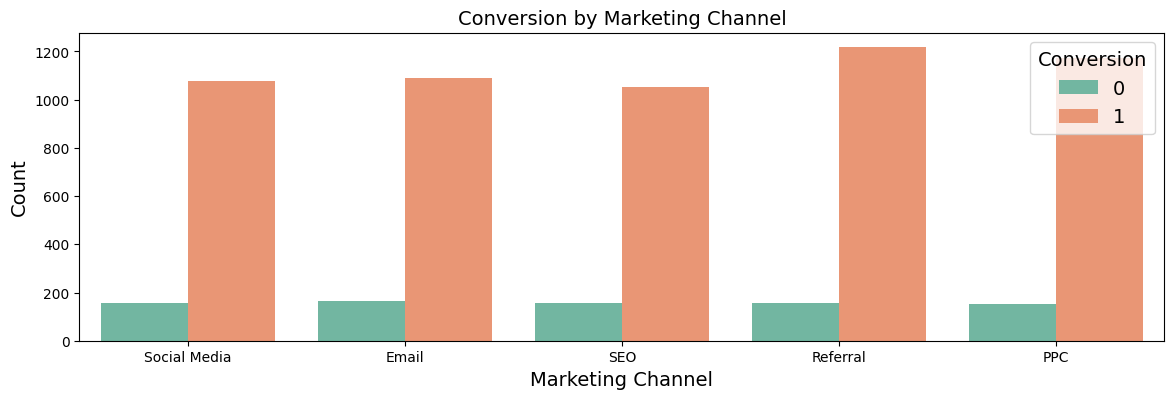

In [141]:
plt.figure(figsize=(14, 4))
ax = sns.countplot(data= marketing_data, x='CampaignType', hue='Conversion', palette='Set1')
plt.title('Conversion by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Count')

plt.grid(False)
plt.show()

plt.figure(figsize=(14, 4))

ax = sns.countplot(data=marketing_data, x='CampaignChannel', hue='Conversion', palette='Set2')
plt.title('Conversion by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Count')

plt.grid(False)
plt.show()


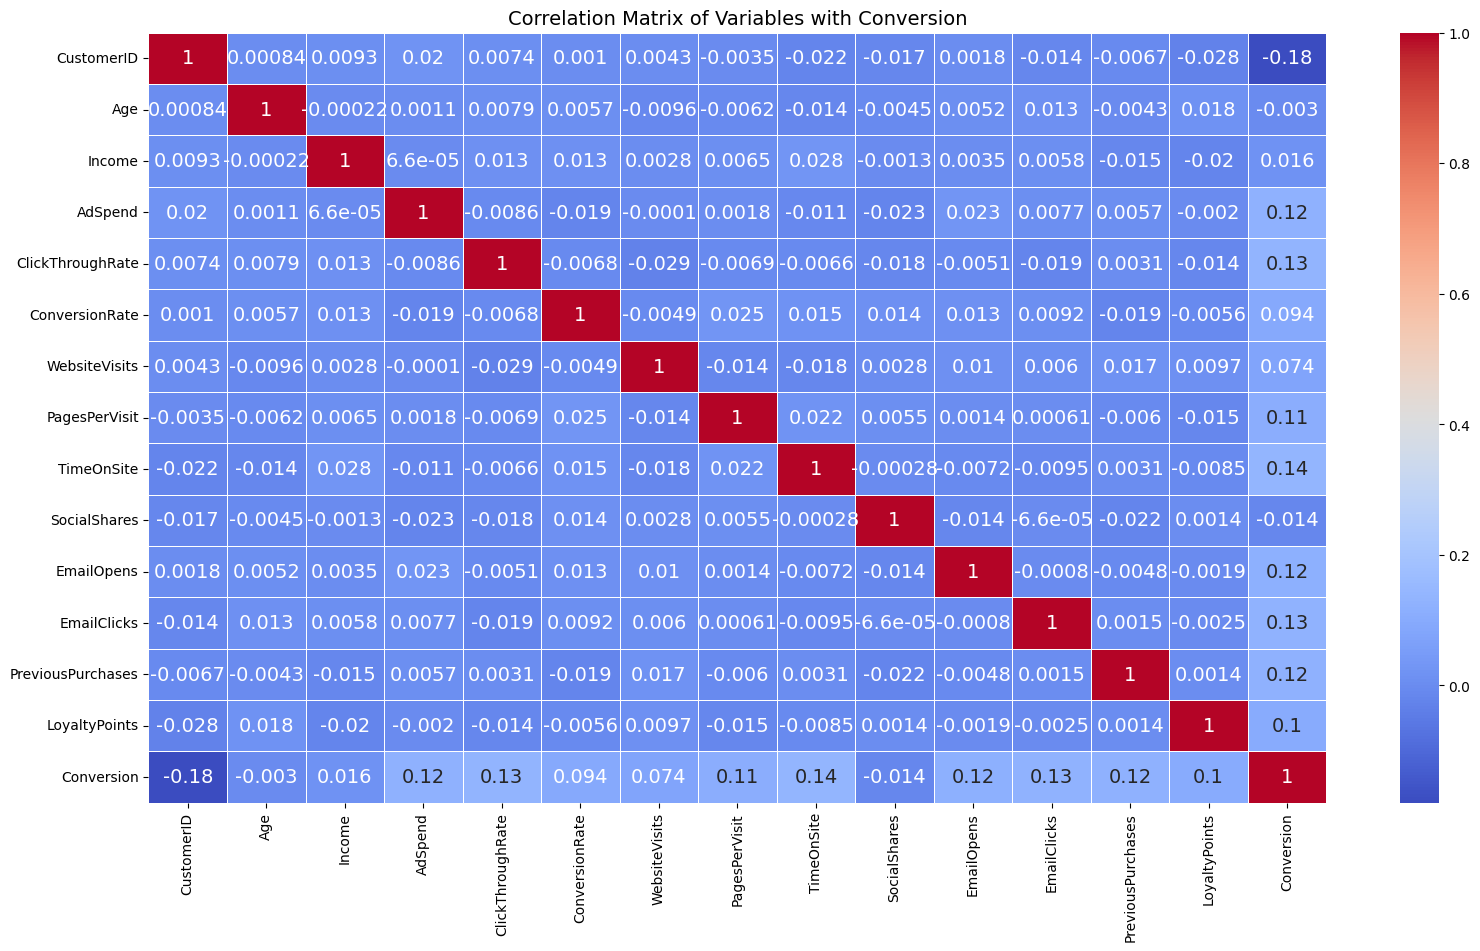

In [142]:
marketing_data_numeric = marketing_data.select_dtypes(exclude=['object', 'category'])

corr_matrix = marketing_data_numeric.corr()

plt.figure(figsize=(19, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Variables with Conversion')
plt.show()

In [143]:
marketing_data.drop(['CustomerID'],axis=1,inplace=True)
marketing_data.drop(['AdSpend_bins'],axis=1,inplace=True)

## Data Processing

Handling the missing values -

In [144]:
class MissingDataHandler:

    def __init__(self, df):
        self.df = df
        self.column_to_missing = {}


    def return_missing_data(self):
      # To return the missing value as per the type of the column

      for columns in self.df.columns:
        if self.df[columns].dtype == 'object' or self.df[columns].dtype == 'category':
          missing_value = self.df[columns].mode()[0]
          self.column_to_missing[columns] = missing_value
        else:
          missing_value = self.df[columns].mean()
          self.column_to_missing[columns] = missing_value
      return self.column_to_missing


    def check_missing(self):
      # To get the count of missing values in every column, if any

      missing_counts = self.df.isnull().sum()
      return missing_counts



    def report_missing_columns(self):
      # To check if a column is having a missing data and returning that column

      missing_columns = self.df.columns[self.df.isnull().any()].tolist()
      return missing_columns


In [145]:
missing_handler = MissingDataHandler(marketing_data)

print(missing_handler.check_missing())

Age                  0
Gender               0
Income               0
CampaignChannel      0
CampaignType         0
AdSpend              0
ClickThroughRate     0
ConversionRate       0
WebsiteVisits        0
PagesPerVisit        0
TimeOnSite           0
SocialShares         0
EmailOpens           0
EmailClicks          0
PreviousPurchases    0
LoyaltyPoints        0
Conversion           0
dtype: int64


In [146]:
data_to_replace_in_missing_columns = missing_handler.return_missing_data()

In [173]:
for column, missing_value in data_to_replace_in_missing_columns.items():
  marketing_data[column].fillna(missing_value, inplace=True)

In [148]:
marketing_data_cat['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [149]:
marketing_data_cat['CampaignChannel'].unique()

array(['Social Media', 'Email', 'PPC', 'Referral', 'SEO'], dtype=object)

In [150]:
marketing_data_cat['CampaignType'].unique()

array(['Awareness', 'Retention', 'Conversion', 'Consideration'],
      dtype=object)

Scaling the numeric values -

In [151]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

categorical_columns = ['Gender', 'CampaignChannel', 'CampaignType']
columns_to_scale = [col for col in marketing_data.columns if col not in categorical_columns]

column_transformer = ColumnTransformer(transformers = [('num', scaler, columns_to_scale)], remainder='passthrough')

data_scaled = column_transformer.fit_transform(marketing_data)

In [152]:
all_columns = columns_to_scale + categorical_columns

marketing_data = pd.DataFrame(data_scaled, columns=all_columns)

There are no order in the categories. We will use One Hot Encoding -

In [153]:
onehotencoder = OneHotEncoder(drop='first', sparse_output=False) # Creating the OneHotEncoder with drop='first' to avoid multicollinearity

columns_to_encode = ['Gender', 'CampaignChannel', 'CampaignType'] # Defining the columns to be encoded
column_transformer = ColumnTransformer(transformers = [('cat', onehotencoder, columns_to_encode)], remainder='passthrough') # Using ColumnTransformer to apply OneHotEncoder only to the categorical columns

In [157]:
data_encoded = column_transformer.fit_transform(marketing_data) # Fitting and transforming the data

In [159]:
encoded_columns = column_transformer.named_transformers_['cat'].get_feature_names_out()

In [160]:
all_columns = list(encoded_columns) + [col for col in marketing_data.columns if col not in columns_to_encode]

data_encoded_df = pd.DataFrame(data_encoded, columns=all_columns)

In [161]:
data_encoded_df.head()

,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,Age,Income,...,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.187589,1.255559,...,0.436789,0.714702,-0.480417,1.100174,-0.268326,1.322327,-1.558752,0.176671,-0.857479,0.37526
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.627801,-0.542982,...,-0.533424,1.065271,1.331265,1.209449,0.668035,-0.598438,-1.558752,-0.169531,0.81399,0.37526
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.829511,0.936737,...,0.954242,1.415841,0.590154,-0.51447,-1.031287,1.147712,-0.160523,0.522874,1.705579,0.37526
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.695038,0.169332,...,-0.712341,0.294018,0.830785,1.520432,1.430996,-0.598438,1.237705,1.215279,-0.369443,0.37526
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.254825,-0.572632,...,1.351362,-1.178374,1.084349,-1.436743,0.806756,-0.249208,1.587263,0.522874,-0.209558,0.37526


In [166]:
data_encoded_df = data_encoded_df.astype('float32')

In [167]:
data_encoded_df.describe()

,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,Age,Income,...,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6.400000e+03,6400.000000,...,6.400000e+03,6.400000e+03,6.400000e+03,6400.000000,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03
mean,0.395000,0.207188,0.214844,0.189375,0.192813,0.245781,0.258594,0.247500,1.519918e-08,0.000000,...,-1.192093e-09,-1.400709e-08,-2.980232e-10,0.000000,5.960464e-10,4.172325e-09,1.326203e-08,1.192093e-08,5.960464e-10,2.086163e-08
std,0.488875,0.405315,0.410732,0.391847,0.394532,0.430589,0.437906,0.431607,1.000078e+00,1.000078,...,1.000078e+00,1.000075e+00,1.000079e+00,1.000078,1.000080e+00,1.000071e+00,1.000066e+00,1.000089e+00,1.000077e+00,1.000053e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.725482e+00,-1.722207,...,-1.712769e+00,-1.739285e+00,-1.729560e+00,-1.703768,-1.724888e+00,-1.646129e+00,-1.558752e+00,-1.554341e+00,-1.737897e+00,-2.664820e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.514053e-01,-0.865966,...,-8.713395e-01,-8.278041e-01,-8.688945e-01,-0.868629,-8.578869e-01,-7.730535e-01,-8.596375e-01,-8.619362e-01,-8.728387e-01,3.752599e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.456530e-02,-0.000535,...,-1.382279e-02,1.356266e-02,-7.091590e-03,-0.020756,9.114351e-03,-7.459336e-02,-1.605232e-01,-1.695311e-01,7.579622e-03,3.752599e-01
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.295113e-01,0.855293,...,8.648007e-01,8.549294e-01,8.796243e-01,0.882875,8.761156e-01,7.984818e-01,8.881482e-01,8.690766e-01,8.475029e-01,3.752599e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.703588e+00,1.740158,...,1.757626e+00,1.696296e+00,1.714435e+00,1.731393,1.708437e+00,1.671557e+00,1.587263e+00,1.561482e+00,1.752358e+00,3.752599e-01


Let's create classes for dropping columns, and handling missing values

In [436]:
from sklearn.base import BaseEstimator, TransformerMixin


class DropCustomerID(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame) and 'CustomerID' in X.columns:
            return X.drop(columns=['CustomerID'])
        return X


    def get_feature_names_out(self, input_features=None):
        return [col for col in input_features if col != 'CustomerID']

In [437]:
class DropCustomColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop if columns_to_drop else []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            return X.drop(columns=[col for col in self.columns_to_drop if col in X.columns])
        return X

    def get_feature_names_out(self, input_features=None):
        return [col for col in input_features if col != 'CustomerID']

In [438]:
class MissingDataHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.column_to_missing = {}

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            for column in X.columns:
                if X[column].dtype == 'object' or X[column].dtype.name == 'category':
                    self.column_to_missing[column] = X[column].mode()[0]
                else:
                    self.column_to_missing[column] = X[column].mean()
        return self



    def transform(self, X):
        X_filled = X.copy()
        if isinstance(X_filled, pd.DataFrame):
            for column, missing_value in self.column_to_missing.items():
                X_filled[column].fillna(missing_value, inplace=True)
        return X_filled



    def get_feature_names_out(self, input_features=None):
        return input_features if input_features is not None else []

## Creating Transformation Pipelines for all the above

In [417]:
from sklearn.pipeline import Pipeline, make_pipeline

Creating pipeline for numerical records and converting the same -

In [418]:
num_pipeline = Pipeline([
    ('drop_customer_id', DropCustomerID()),
    ("impute", MissingDataHandler()),
    ("scaler", StandardScaler()),
])

marketing_data_numeric = data.select_dtypes(exclude=['object', 'category'])

data_num_transformed = num_pipeline.fit_transform(marketing_data_numeric)

In [202]:
df_market_num_prepared = pd.DataFrame(data_num_transformed, columns = num_pipeline.get_feature_names_out(input_features=marketing_data_numeric.columns), index=marketing_data_numeric.index)

In [203]:
df_market_num_prepared.head()

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,0.830400,1.390381,0.527484,-1.320328,-0.298084,-1.729507,-1.208303,-0.078268,-1.065759,-0.608829,1.586840,-0.168115,-1.260823,0.375368
1,1.702775,-1.141736,-0.388418,0.010671,1.427538,1.205221,-1.009576,-0.561778,-1.550199,-1.309262,0.886654,-0.860656,0.677701,0.375368
2,0.159343,0.100905,-1.217296,1.460225,-0.509632,-1.589758,1.025746,1.435016,-1.723213,0.266712,-0.863810,1.216969,-0.107223,0.375368
3,-0.780138,-1.079865,-1.572106,-0.204964,-0.298580,1.554594,-0.386761,1.646339,1.356440,-1.309262,-0.863810,-1.553198,-0.019076,0.375368
4,1.098823,-0.018633,-1.170918,1.166907,0.101164,-1.729507,-1.343379,1.481958,-1.515596,-0.608829,0.536561,1.216969,1.297525,0.375368


In [204]:
num_pipeline.steps

[('drop_customer_id', DropCustomerID()),
 ('impute', MissingDataHandler()),
 ('scaler', StandardScaler())]

In [205]:
num_pipeline.named_steps['drop_customer_id'], num_pipeline.named_steps['impute']

(DropCustomerID(), MissingDataHandler())

Creating pipeline for categorical records and converting the same -

In [419]:
marketing_data_cat = data.select_dtypes(include=['object', 'category'])

cat_pipeline = Pipeline([
    ('drop_custom_columns', DropCustomColumns(columns_to_drop=['AdvertisingPlatform', 'AdvertisingTool'])),
    ('impute', MissingDataHandler()),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False)),
    ])

preprocessing_full_data = ColumnTransformer([
    ("num", num_pipeline, marketing_data_numeric),
    ("cat", cat_pipeline, marketing_data_cat),
])

We can do all of the above in just few lines since we have the classes and functions designed -

In [420]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [240]:
marketing_data = strat_train_set.copy()  # Getting a new copy to apply all the steps at once

In [241]:
marketing_data_processed = preprocessing.fit_transform(marketing_data)

In [242]:
marketing_data_processed.shape

(6400, 22)

In [243]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('drop_customer_id',
                                                  DropCustomerID()),
                                                 ('impute',
                                                  MissingDataHandler()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x79f789b7bee0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('drop_custom_columns',
                                                  DropCustomColumns(columns_to_drop=['AdvertisingPlatform',
                                                                                     'AdvertisingTool'])),
                                                 ('impute',
                                                  MissingDataHandler()),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x79f789b78550>)])

## Model Training

Now, we can make use of the preprocessing object and the model object on our dataset directly from the raw dataset. All the data transformations as required will be handled by the preprocessing object.

In [310]:
features = strat_train_set.drop('Conversion', axis=1)
target = strat_train_set['Conversion']

In [311]:
features.shape

(6400, 19)

#### Looking into KNeighborsClassifier

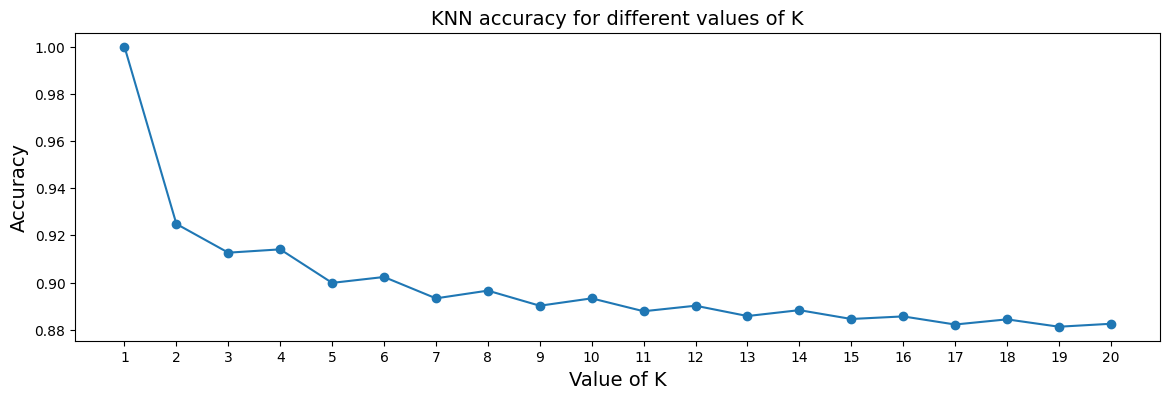

In [260]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_class = make_pipeline(preprocessing, KNeighborsClassifier(n_neighbors=k))
    knn_class.fit(features, target)
    y_pred = knn_class.predict(features)
    accuracy = accuracy_score(target, knn_class.predict(features))
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(14, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

In [261]:
knn_class = make_pipeline(preprocessing, KNeighborsClassifier(n_neighbors=2))
knn_class.fit(features, target)
y_pred = knn_class.predict(features)
accuracy = accuracy_score(target, knn_class.predict(features))
accuracy

0.92484375

Let's look into the test set we saved

In [262]:
features_to_test = strat_test_set.drop('Conversion', axis=1)
target_to_test = strat_test_set['Conversion']

In [265]:
test_data_prediction = knn_class.predict(features_to_test)

In [271]:
test_accuracy = accuracy_score(target_to_test, test_data_prediction)
test_accuracy

0.785

In [267]:
train_pred_df = pd.DataFrame({
    'Actual': target,
    'Predicted': y_pred
})

test_pred_df = pd.DataFrame({
    'Actual': target_to_test,
    'Predicted': test_data_prediction
})

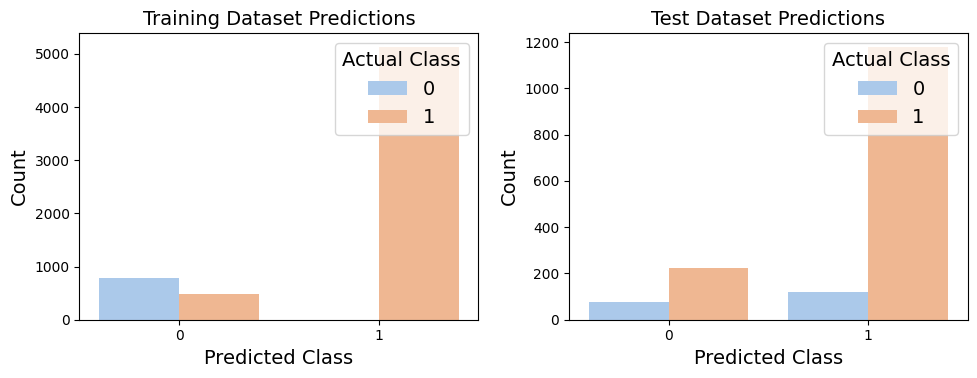

In [269]:
plt.figure(figsize=(10, 4))

# Plot predictions for the training dataset
plt.subplot(1, 2, 1)
sns.countplot(x='Predicted', hue='Actual', data=train_pred_df, palette='pastel')
plt.title('Training Dataset Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.legend(title='Actual Class', loc='upper right')


# Plot predictions for the test dataset
plt.subplot(1, 2, 2)
sns.countplot(x='Predicted', hue='Actual', data=test_pred_df, palette='pastel')
plt.title('Test Dataset Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.legend(title='Actual Class', loc='upper right')

plt.tight_layout()
plt.show()

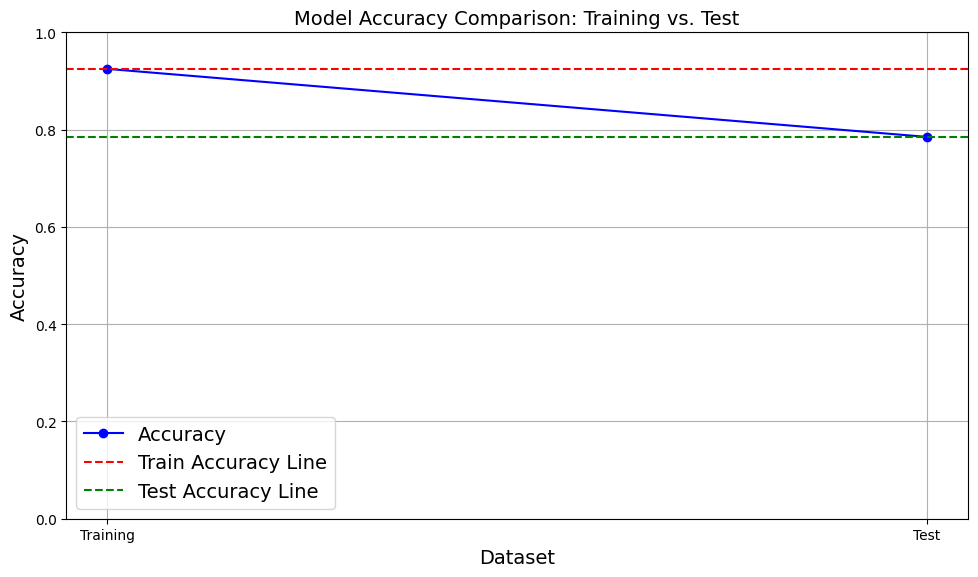

In [272]:
accuracy_data = {
    'Dataset': ['Training', 'Test'],
    'Accuracy': [accuracy, test_accuracy]
}
accuracy_df = pd.DataFrame(accuracy_data)


plt.figure(figsize=(10, 6))
plt.plot(accuracy_df['Dataset'], accuracy_df['Accuracy'], marker='o', color='b', label='Accuracy')
plt.title('Model Accuracy Comparison: Training vs. Test')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.axhline(y=accuracy, color='r', linestyle='--', label='Train Accuracy Line')
plt.axhline(y=test_accuracy, color='g', linestyle='--', label='Test Accuracy Line')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [273]:
class_report_training = classification_report(target, y_pred, target_names=['Not Converted', 'Converted'])
print(class_report_training)

               precision    recall  f1-score   support

Not Converted       0.62      1.00      0.77       790
    Converted       1.00      0.91      0.96      5610

     accuracy                           0.92      6400
    macro avg       0.81      0.96      0.86      6400
 weighted avg       0.95      0.92      0.93      6400



In [270]:
class_report = classification_report(target_to_test, test_data_prediction, target_names=['Not Converted', 'Converted'])
print(class_report)

               precision    recall  f1-score   support

Not Converted       0.26      0.39      0.31       198
    Converted       0.91      0.84      0.87      1402

     accuracy                           0.79      1600
    macro avg       0.58      0.61      0.59      1600
 weighted avg       0.83      0.79      0.80      1600



KNeighbors classifier is probably not the best model to go with since there is a sign of overfitting, as we can see. Let's try out multiple models -

## Multiple Model Training

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [280]:
models = [
            # Naive Bayes Model
            make_pipeline(preprocessing, GaussianNB()),

            # Decision Tree Model
            make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42)),

            # Random forest model
            make_pipeline(preprocessing, RandomForestClassifier(n_estimators=100, random_state=42)),

            # Logistic regression model
            make_pipeline(preprocessing, LogisticRegression(random_state=50)),

            # Ada Boost Model
            make_pipeline(preprocessing, AdaBoostClassifier(random_state=45)),

            # XGBoost Model
            make_pipeline(preprocessing, XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),

            # K-Nearest Neighbors Model
            make_pipeline(preprocessing,  KNeighborsClassifier(n_neighbors=2)),

            # Gradient Boosting Classifier
            make_pipeline(preprocessing, GradientBoostingClassifier(random_state=42)),

            # Support Vector Machine Model
            make_pipeline(preprocessing, SVC(kernel='linear', random_state=42)),
  ]

Over the training and testing dataset -

In [293]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

In [294]:
model_evaluation_frame = pd.DataFrame()

In [295]:
# Evaluate each model
for i, model in enumerate(models):
    model.fit(features, target)
    train_accuracy = accuracy_score(target, model.predict(features))
    test_accuracy = accuracy_score(target_to_test, model.predict(features_to_test))
    model_name = list(model.named_steps.keys())[-1]
    print(f"Model {i+1}: {model_name}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")
    model_evaluation_frame.loc[i, 'Model Name'] = model_name
    model_evaluation_frame.loc[i, 'Training Accuracy'] = train_accuracy
    model_evaluation_frame.loc[i, 'Testing Accuracy'] = test_accuracy
    model_evaluation_frame.loc[i, 'F1 Score Training'] = f1_score(target, model.predict(features))
    model_evaluation_frame.loc[i, 'F1 Score Testing'] = f1_score(target_to_test, model.predict(features_to_test))
    model_evaluation_frame.loc[i, 'Precision Score Training'] = precision_score(target, model.predict(features))
    model_evaluation_frame.loc[i, 'Precision Score Testing'] = precision_score(target_to_test, model.predict(features_to_test))
    model_evaluation_frame.loc[i, 'Recall Score Training'] = recall_score(target, model.predict(features))
    model_evaluation_frame.loc[i, 'Recall Score Testing'] = recall_score(target_to_test, model.predict(features_to_test))
    model_evaluation_frame.loc[i, 'AUC Score Training'] = roc_auc_score(target, model.predict(features))
    model_evaluation_frame.loc[i, 'AUC Score Testing'] = roc_auc_score(target_to_test, model.predict(features_to_test))


Model 1: gaussiannb
Training Accuracy: 0.89390625
Testing Accuracy: 0.89
-----------------
Model 2: decisiontreeclassifier
Training Accuracy: 1.0
Testing Accuracy: 0.82875
-----------------
Model 3: randomforestclassifier
Training Accuracy: 1.0
Testing Accuracy: 0.886875
-----------------
Model 4: logisticregression
Training Accuracy: 0.89359375
Testing Accuracy: 0.89125
-----------------
Model 5: adaboostclassifier
Training Accuracy: 0.9159375
Testing Accuracy: 0.90625
-----------------
Model 6: xgbclassifier
Training Accuracy: 0.99984375
Testing Accuracy: 0.911875
-----------------
Model 7: kneighborsclassifier
Training Accuracy: 0.92484375
Testing Accuracy: 0.785
-----------------
Model 8: gradientboostingclassifier
Training Accuracy: 0.94328125
Testing Accuracy: 0.91
-----------------
Model 9: svc
Training Accuracy: 0.8765625
Testing Accuracy: 0.87625
-----------------


In [296]:
model_evaluation_frame

,Model Name,Training Accuracy,Testing Accuracy,F1 Score Training,F1 Score Testing,Precision Score Training,Precision Score Testing,Recall Score Training,Recall Score Testing,AUC Score Training,AUC Score Testing
0,gaussiannb,0.893906,0.890000,0.942608,0.940661,0.896319,0.891944,0.993939,0.995007,0.588742,0.570736
1,decisiontreeclassifier,1.000000,0.828750,1.000000,0.901651,1.000000,0.907514,1.000000,0.895863,1.000000,0.624699
2,randomforestclassifier,1.000000,0.886875,1.000000,0.939119,1.000000,0.888606,1.000000,0.995720,1.000000,0.555941
3,logisticregression,0.893594,0.891250,0.942273,0.941176,0.898335,0.894602,0.990731,0.992867,0.597264,0.582292
4,adaboostclassifier,0.915937,0.906250,0.954135,0.948980,0.914379,0.907022,0.997504,0.995007,0.667107,0.636392
5,xgbclassifier,0.999844,0.911875,0.999911,0.951663,0.999822,0.916172,1.000000,0.990014,0.999367,0.674300
6,kneighborsclassifier,0.924844,0.785000,0.955210,0.872687,1.000000,0.906923,0.914260,0.840942,0.957130,0.614915
7,gradientboostingclassifier,0.943281,0.910000,0.968612,0.950752,0.940554,0.913272,0.998396,0.991441,0.775147,0.662387
8,svc,0.876563,0.876250,0.934221,0.934044,0.876563,0.876250,1.000000,1.000000,0.500000,0.500000


In [365]:
# Train models that support feature importances
models_with_feature_importances = [("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
                                   ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
                                   ("XGBClassifier", XGBClassifier(random_state=42))]

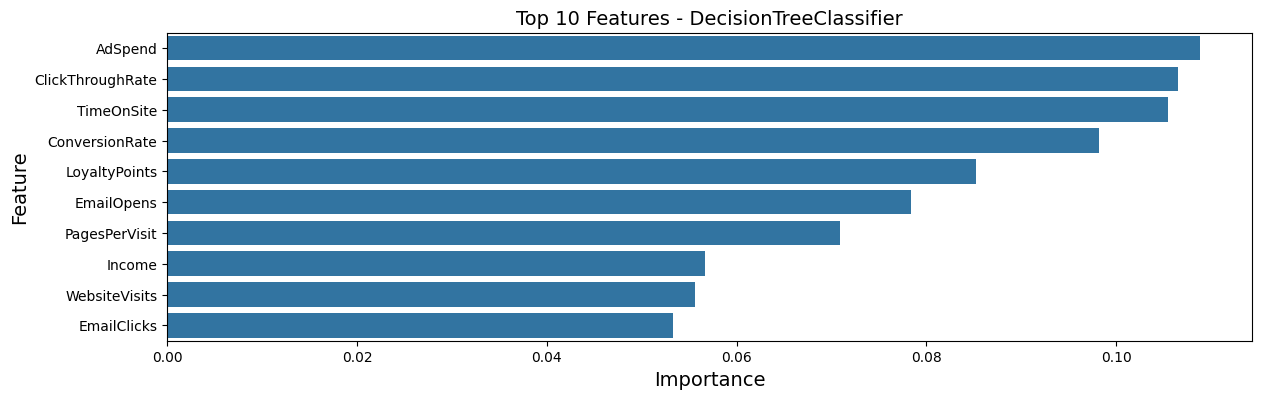

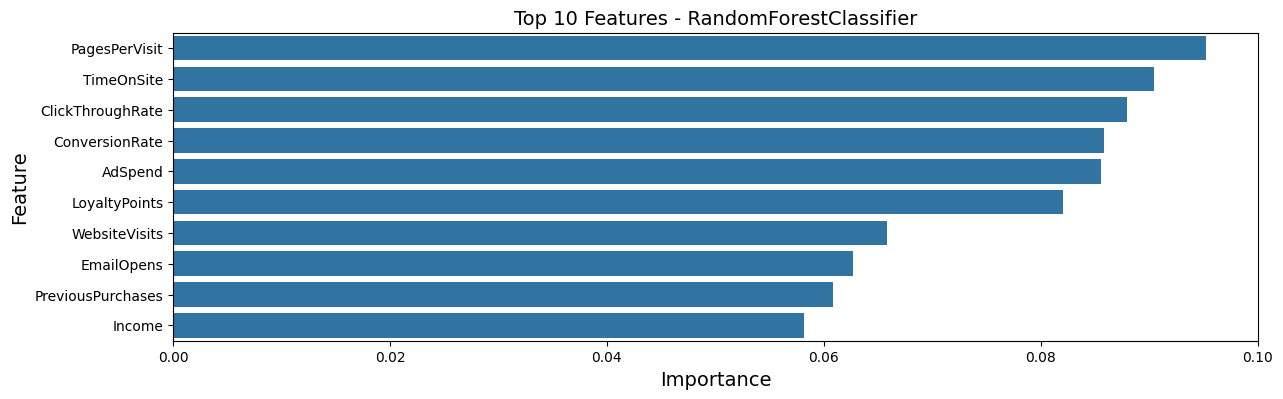

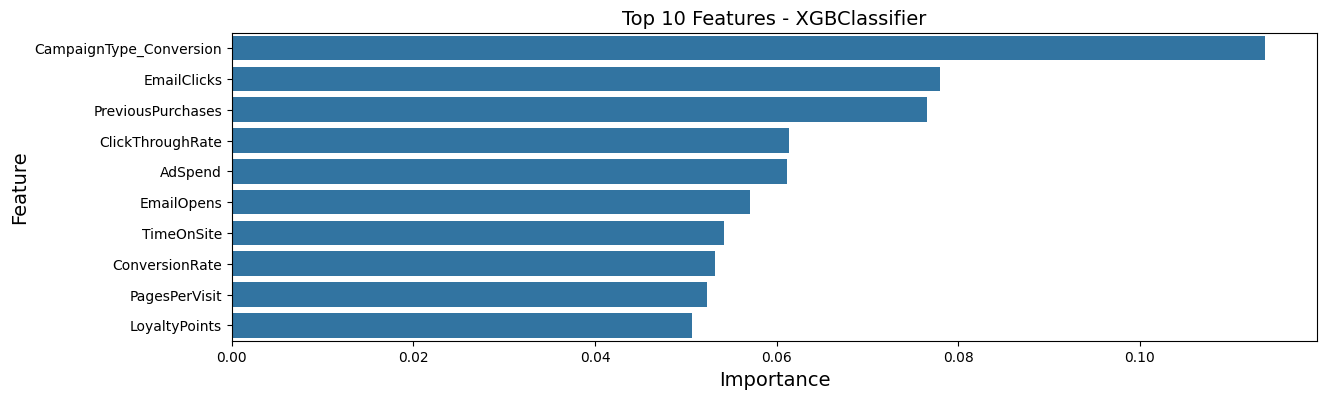

In [374]:
def plot_feature_importances(models, features, target, preprocessing):
    complete_result = pd.DataFrame()

    for model_name, model in models:
        pipeline = make_pipeline(preprocessing, model)

        pipeline.fit(features, target)

        model_step = pipeline.named_steps[model.__class__.__name__.lower()]

        if hasattr(model_step, 'feature_importances_'):
            # Retrieve the model's feature importances
            feature_importances = model_step.feature_importances_

            # Get feature names from the preprocessing step
            onehot_names = pipeline.named_steps['columntransformer'].named_transformers_['pipeline-2'].named_steps['encoder']
            if hasattr(onehot_names, 'get_feature_names_out'):
                # If OneHotEncoder is used, get the feature names
                ohe_feature_names = onehot_names.get_feature_names_out()
                other_columns = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
                                  'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']
                all_feature_names = np.concatenate([other_columns, ohe_feature_names])

            else:
                # If no OneHotEncoder, just use original features
                all_feature_names = features.columns



            feature_importances_df = pd.DataFrame({
                'Feature': all_feature_names,
                'Importance': feature_importances,
                'Model' : model_name
            })


            feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

            complete_result = pd.concat([complete_result, feature_importances_df[:10]])

            # Plot the top 10 features
            plt.figure(figsize=(14, 4))
            sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10])
            plt.title(f"Top 10 Features - {model_name}")
            plt.xlabel('Importance')
            plt.ylabel('Feature')
            plt.grid(False)
            plt.show()
        else:
            print(f"{model_name} does not support feature importances.")

    return complete_result


feature_importance_df = plot_feature_importances(models_with_feature_importances, features, target, preprocessing)


In [375]:
feature_importance_df

,Feature,Importance,Model
2,AdSpend,0.108875,DecisionTreeClassifier
3,ClickThroughRate,0.106551,DecisionTreeClassifier
7,TimeOnSite,0.105481,DecisionTreeClassifier
4,ConversionRate,0.098197,DecisionTreeClassifier
12,LoyaltyPoints,0.085210,DecisionTreeClassifier
9,EmailOpens,0.078392,DecisionTreeClassifier
6,PagesPerVisit,0.070913,DecisionTreeClassifier
1,Income,0.056682,DecisionTreeClassifier
5,WebsiteVisits,0.055646,DecisionTreeClassifier
10,EmailClicks,0.053274,DecisionTreeClassifier


In [376]:
feature_importance_df['Feature'].value_counts()

,count
Feature,
AdSpend,3
ClickThroughRate,3
TimeOnSite,3
ConversionRate,3
LoyaltyPoints,3
EmailOpens,3
PagesPerVisit,3
Income,2
WebsiteVisits,2


We had GradientBoostingClassifier as the best performing model and we got the important features from the above. Let's use it to finetune the dataset using GridSearch to get out final model.

## Gradient Boosting Classifier

Picking up the stratified sample dataset from the raw dataset. No processing is there in this dataset.

In [433]:
features_to_train = strat_train_set.drop('Conversion', axis=1)
target_to_train = strat_train_set['Conversion']



features_to_test = strat_test_set.drop('Conversion', axis=1)
target_to_test = strat_test_set['Conversion']

Picking up top 10 important features that we got using classifiers -

In [426]:
important_features = list(feature_importance_df['Feature'].unique()[:-1])
important_features.append('CampaignType')

new_dataset_train = features_to_train[important_features]
new_dataset_test = features_to_test[important_features]

Let's initialize the pipelines again and use preprocessing with new set of columns-

In [439]:
num_pipeline = Pipeline([
    ('drop_customer_id', DropCustomerID()),  # Custom defined
    ("impute", MissingDataHandler()),   # Custom defined
    ("scaler", StandardScaler()),   # Scaler from Scikit
])


cat_pipeline = Pipeline([
    ('drop_custom_columns', DropCustomColumns(columns_to_drop=['AdvertisingPlatform', 'AdvertisingTool'])), # Custom defined
    ('impute', MissingDataHandler()),    # Custom defined
    ('encoder', OneHotEncoder(drop='first', sparse_output=False)),   # OneHotEncoder from Scikit
    ])



#combining both
new_preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [441]:
X_train, y_train, X_test, y_test = features_to_train, target_to_train, features_to_test, target_to_test

In [442]:
gbc_model = make_pipeline(new_preprocessing, GradientBoostingClassifier(random_state=42))

gbc_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('drop_customer_id',
                                                                   DropCustomerID()),
                                                                  ('impute',
                                                                   MissingDataHandler()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79f769d80fd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('drop_custom_columns',
                                                                   DropCustomColumns(columns_to_drop=['AdvertisingPlatform',
                                                                                                      'AdvertisingTool'])),
                                                                  ('impute',
                                                                   MissingDataHandler()),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79f768e3b160>)])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [443]:
train_prediction = gbc_model.predict(X_train)

In [444]:
print('Accuracy Score : ', accuracy_score(y_train, train_prediction))
print('F1 Score : ', f1_score(y_train, train_prediction))
print('Precision Score : ', precision_score(y_train, train_prediction))
print('Recall Score : ', recall_score(y_train, train_prediction))
print('AUC Score : ', roc_auc_score(y_train, train_prediction))

Accuracy Score :  0.94328125
F1 Score :  0.9686121919584955
Precision Score :  0.9405541561712847
Recall Score :  0.9983957219251337
AUC Score :  0.7751472280511745


In [445]:
test_prediction = gbc_model.predict(X_test)

In [446]:
print('Accuracy Score : ', accuracy_score(y_test, test_prediction))
print('F1 Score : ', f1_score(y_test, test_prediction))
print('Precision Score : ', precision_score(y_test, test_prediction))
print('Recall Score : ', recall_score(y_test, test_prediction))
print('AUC Score : ', roc_auc_score(y_test, test_prediction))

Accuracy Score :  0.91
F1 Score :  0.9507523939808481
Precision Score :  0.9132720105124835
Recall Score :  0.9914407988587732
AUC Score :  0.6623870660960534


We have got a pretty much good model. Let's try with grid search once -

## Using GridSearchCV -

In [504]:
important_features = list(feature_importance_df['Feature'].unique()[:-1])
len(important_features)

11

In [505]:
important_features.append('CampaignType')
important_features.append('Conversion')

In [506]:
marketing_data = data[important_features]

In [507]:
features = marketing_data.drop('Conversion', axis=1)
target = marketing_data['Conversion']

In [508]:
train_set, test_set = train_test_split(marketing_data, test_size=0.2, stratify=target, random_state=42)


X_train, y_train = train_set.drop('Conversion', axis=1), train_set['Conversion']
X_test, y_test = test_set.drop('Conversion', axis=1), test_set['Conversion']

In [509]:
num_cols = X_train.select_dtypes(exclude=['object', 'category']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

In [510]:
num_pipeline = Pipeline([
    ('drop_customer_id', DropCustomerID()),  # Custom defined
    ("impute", MissingDataHandler()),   # Custom defined
    ("scaler", StandardScaler()),   # Scaler from Scikit
])


cat_pipeline = Pipeline([
    ('drop_custom_columns', DropCustomColumns(columns_to_drop=['AdvertisingPlatform', 'AdvertisingTool'])), # Custom defined
    ('impute', MissingDataHandler()),    # Custom defined
    ('encoder', OneHotEncoder(drop='first', sparse_output=False)),   # OneHotEncoder from Scikit
    ])

In [511]:
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols),
])


pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [512]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5],
    'classifier__subsample': [0.8, 1.0],
}


grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=2,
                           error_score='raise')


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.5s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.6s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   1.5s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estima

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('drop_customer_id',
                                                                                          DropCustomerID()),
                                                                                         ('impute',
                                                                                          MissingDataHandler()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['AdSpend', 'ClickThroughRate', 'TimeOnSite', 'ConversionRate',
       'LoyaltyPoints', 'EmailOpens', 'PagesPerVisit', 'In...
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         Index(['CampaignType'], dtype='object'))])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [513]:
grid_search.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 200,
 'classifier__subsample': 0.8}

In [515]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('drop_customer_id',
                                                                   DropCustomerID()),
                                                                  ('impute',
                                                                   MissingDataHandler()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['AdSpend', 'ClickThroughRate', 'TimeOnSite', 'ConversionRate',
       'LoyaltyPoints', 'EmailOpens', 'PagesPerVisit', 'Income',
       'WebsiteVisits', 'EmailClicks', 'PreviousPur...
                                                 ('cat',
                                                  Pipeline(steps=[('drop_custom_columns',
                                                                   DropCustomColumns(columns_to_drop=['AdvertisingPlatform',
                                                                                                      'AdvertisingTool'])),
                                                                  ('impute',
                                                                   MissingDataHandler()),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['CampaignType'], dtype='object'))])),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=200, random_state=42,
                                            subsample=0.8))])

In [514]:
grid_search.best_score_

0.9232812499999999

In [516]:
best_params = grid_search.best_params_

In [517]:
new_preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [518]:
final_model = GradientBoostingClassifier(
    n_estimators=best_params['classifier__n_estimators'],
    learning_rate=best_params['classifier__learning_rate'],
    max_depth=best_params['classifier__max_depth'],
    subsample=best_params['classifier__subsample'],
    random_state=42
)

In [519]:
gbc_model = make_pipeline(new_preprocessing, final_model)

gbc_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('drop_customer_id',
                                                                   DropCustomerID()),
                                                                  ('impute',
                                                                   MissingDataHandler()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79f769d82050>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('drop_custom_columns',
                                                                   DropCustomColumns(columns_to_drop=['AdvertisingPlatform',
                                                                                                      'AdvertisingTool'])),
                                                                  ('impute',
                                                                   MissingDataHandler()),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79f769d80340>)])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(n_estimators=200, random_state=42,
                                            subsample=0.8))])

In [520]:
train_prediction = gbc_model.predict(X_train)

print('Accuracy Score : ', accuracy_score(y_train, train_prediction))
print('F1 Score : ', f1_score(y_train, train_prediction))
print('Precision Score : ', precision_score(y_train, train_prediction))
print('Recall Score : ', recall_score(y_train, train_prediction))
print('AUC Score : ', roc_auc_score(y_train, train_prediction))

Accuracy Score :  0.9546875
F1 Score :  0.9747650539505743
Precision Score :  0.9522271336280177
Recall Score :  0.9983957219251337
AUC Score :  0.8213497596967441


In [521]:
test_prediction = gbc_model.predict(X_test)

print('Accuracy Score : ', accuracy_score(y_test, test_prediction))
print('F1 Score : ', f1_score(y_test, test_prediction))
print('Precision Score : ', precision_score(y_test, test_prediction))
print('Recall Score : ', recall_score(y_test, test_prediction))
print('AUC Score : ', roc_auc_score(y_test, test_prediction))

Accuracy Score :  0.921875
F1 Score :  0.9567922571724853
Precision Score :  0.9282360831656606
Recall Score :  0.9871611982881597
AUC Score :  0.7233785789420596


## Saving Model

In [522]:
import pickle

In [524]:
# Save the model
with open('/content/drive/MyDrive/Projects/gcb_model.pkl', 'wb') as model_file:
    pickle.dump(grid_search.best_estimator_, model_file)

In [526]:
# Load the saved model
with open('/content/drive/MyDrive/Projects/gcb_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


Picking up a new data from the dataset and changing few of its parameters -

In [536]:
new_data = data.iloc[[7640]]
new_data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
7640,15640,67,Male,113621,Social Media,Awareness,9056.4489,0.032516,0.066029,1,1.605476,2.531822,94,10,6,9,964,IsConfid,ToolConfid,0


In [537]:
loaded_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('drop_customer_id',
                                                                   DropCustomerID()),
                                                                  ('impute',
                                                                   MissingDataHandler()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['AdSpend', 'ClickThroughRate', 'TimeOnSite', 'ConversionRate',
       'LoyaltyPoints', 'EmailOpens', 'PagesPerVisit', 'Income',
       'WebsiteVisits', 'EmailClicks', 'PreviousPur...
                                                 ('cat',
                                                  Pipeline(steps=[('drop_custom_columns',
                                                                   DropCustomColumns(columns_to_drop=['AdvertisingPlatform',
                                                                                                      'AdvertisingTool'])),
                                                                  ('impute',
                                                                   MissingDataHandler()),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['CampaignType'], dtype='object'))])),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=200, random_state=42,
                                            subsample=0.8))])

In [538]:
new_predictions = loaded_model.predict(new_data)

In [540]:
new_predictions, loaded_model.predict_proba(new_data)

(array([1]), array([[0.40047856, 0.59952144]]))

In [541]:
new_data = data.iloc[[764]]
new_data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
764,8764,33,Male,85843,Social Media,Consideration,2903.514391,0.226411,0.014343,0,4.832082,5.370221,80,14,7,3,329,IsConfid,ToolConfid,1


In [542]:
loaded_model.predict(new_data), loaded_model.predict_proba(new_data)

(array([1]), array([[0.27579522, 0.72420478]]))